# Proyecto Games

Vamos a analizar el comportamiento de consumo de una tienda de videojuegos. Analizaremos patrones de ventas de juegos por genero y region. El objetivo es estudiar el comportamiento y que sugerencias podemos darle al negocio para mejorar y tener un enfoque que los dirija a un mejor servicio y ventas.


In [ ]:
#Importamos las librerias que podemos necesitar
#Montamos el archivo CSV en un DataFrame df

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Archivos CSV /games.csv')


In [ ]:
#Mostramos las primeras filas del DataFrame
print("Primeras 10 filas del DataFrame:")
display(df.head(10))

#Mostramos información general del DataFrame
print("\nInformación general del DataFrame:")
display(df.info())

Primeras 10 filas del DataFrame:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

#Ahora iniciamos el proceso de limpieza y preparacion de datos

- Vemos que hay algunos detalles que podemos corregir antes de iniciar el analisis.


In [ ]:
#Empezaremos poniendo los nombres de las columnas todo en minusculas
df.columns = df.columns.str.lower()

#Mostramos el resultado.
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Procederemos a manejar los ausentes y cambio de tipo de dato en los que lo requieran.
Eliminaremos los valores ausentes de las columnas genre, name y year_of_release puesto que no impactan tanto con respecto a la cantidad de datos y la informacion que contienen es importante que las columnas esten limpias para poder hacer un buen analisis o comparacion en caso de ser necesario

In [ ]:
#Vamos a abordar un esquema de Visualizacion-Correccion-Verificacion

#Visualizamos cuantos ausentes hay en estas columnas
print('Numero de filas antes de eliminar: ', len(df))
print('Numero de faltantes por columna')
print(df[['name', 'genre', 'year_of_release']].isnull().sum())

#Eliminamos las filas con los valores ausentes en estas columnas
df.dropna(subset = ['name', 'genre', 'year_of_release'], inplace=True)

#Verificamos que se hayan elimonado las filas con ausentes
print('\nNumero de filas totales despues de eliminar: ', len(df))
print('Numero de faltantes por columna despues de eliminar: ')
print(df[['name', 'genre', 'year_of_release']].isnull().sum())


Numero de filas antes de eliminar:  16715
Numero de faltantes por columna
name                 2
genre                2
year_of_release    269
dtype: int64

Numero de filas totales despues de eliminar:  16444
Numero de faltantes por columna despues de eliminar: 
name               0
genre              0
year_of_release    0
dtype: int64


In [ ]:
# Vamos a preparar la columna user_score cambiando a un tipo de datos mas apropiado.
# Como 'object' no nos es de mucha utilidad para analizar las puntuaciones de los usuarios

# La instrucción del proyecto indica que 'tbd' significa "to be determined".
# Cuando convertimos esta columna a numerica, 'tbd' no puede ser interpretado como un número.
# Usaremos pd.to_numeric con errors='coerce'.
# para confirmar la presencia de 'tbd' u otros valores no numéricos.
print("Valores unicos en 'user_score' antes de la conversión: ")
print(df['user_score'].unique()[:50]) # Mostramos solo los primeros 50 para no saturar la salida si hay muchos

#Convertimos la columnas user_score a numerica 'float'
#Errors = 'coerce' nos convertita cualquier valor que no pueda ser pasado ocmo numero a NaN.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Verificamos la cantidad de faltantes despues de la conversion
print("\nNumero de faltantes por columna despues de la conversion: ")
print(df.isnull().sum())




Valores unicos en 'user_score' antes de la conversión: 
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6']

Numero de faltantes por columna despues de la conversion: 
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


# Explicación del cambio de tipo para 'user_score' y 'creitic_score' y porque no eliminamos los ausentes.

- Se convirtio de object a float. Esto se hizo porque las puntuaciones de usuario son inherentemente valores numéricos y necesitamos realizar cálculos y análisis estadísticos con ellas.
- El valor 'tbd' o 'nan' que pudimos ver en los 50 unicos los convertimos todos a NaN; al igual que los faltantes.
- 'tbd' significa "to be determined". Esto probablemente se aplicaba a juegos muy recientes en el momento de la recopilación de datos (diciembre de 2016) que aún no habían recibido suficientes puntuaciones de usuarios para tener un promedio establecido.
- No eliminamos los ausentes ya que representan mas del 50% de los datos del DataFrame; al eliminarlos solo por tener la data mas limpia perderiamos una parte bien significativa de la informacion y segun las instrucciones, nuestro analisis no se basara netamente en la relacion de ventas-puntuacion del usuario.
- Existen varias razones por las que un juego pueda no tener calificacion del usuario. Pueden ser juegos antiguos, menos populares o independientes o simplemente no se recopilaron los datos.
- Si mantenemos estas filas con NaN conservamos más datos, lo que nos permitira realizar análisis más amplio.




In [ ]:
#Ahora seguiremos Calculando las ventas totales por region.

#Sumamos las ventas regionales y creamos una nueva columna.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

#Mostramos el Dataframe con las primeras filas para ver la nueva columna con las ventas totales
print('Dataframe con la nueva columna de ventas totales')
display(df.head())

#De un solo mostramos la informacion del Dataframe para ver el tipo de datos
print('\n Informacion del DataFrame: ')
display(df.info())



Dataframe con la nueva columna de ventas totales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38



 Informacion del DataFrame: 
<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


None

# Analisis Exploratorio de Datos.

Aqui vamos a buscar alguna variacion en las plataformas de juegos, cuales tienen mayor venta y segmentar por años; a la vez queremos investigar sobre los juegos tambien.

In [ ]:
# Vamos a contar el numero de juegos por año de lanzamiento.
games_per_year = df['year_of_release'].value_counts().sort_index()

#Mostramos el resultado para ver y graficamos
print('EL numero de juegos lanzados por año')
display(games_per_year)


EL numero de juegos lanzados por año


,count
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


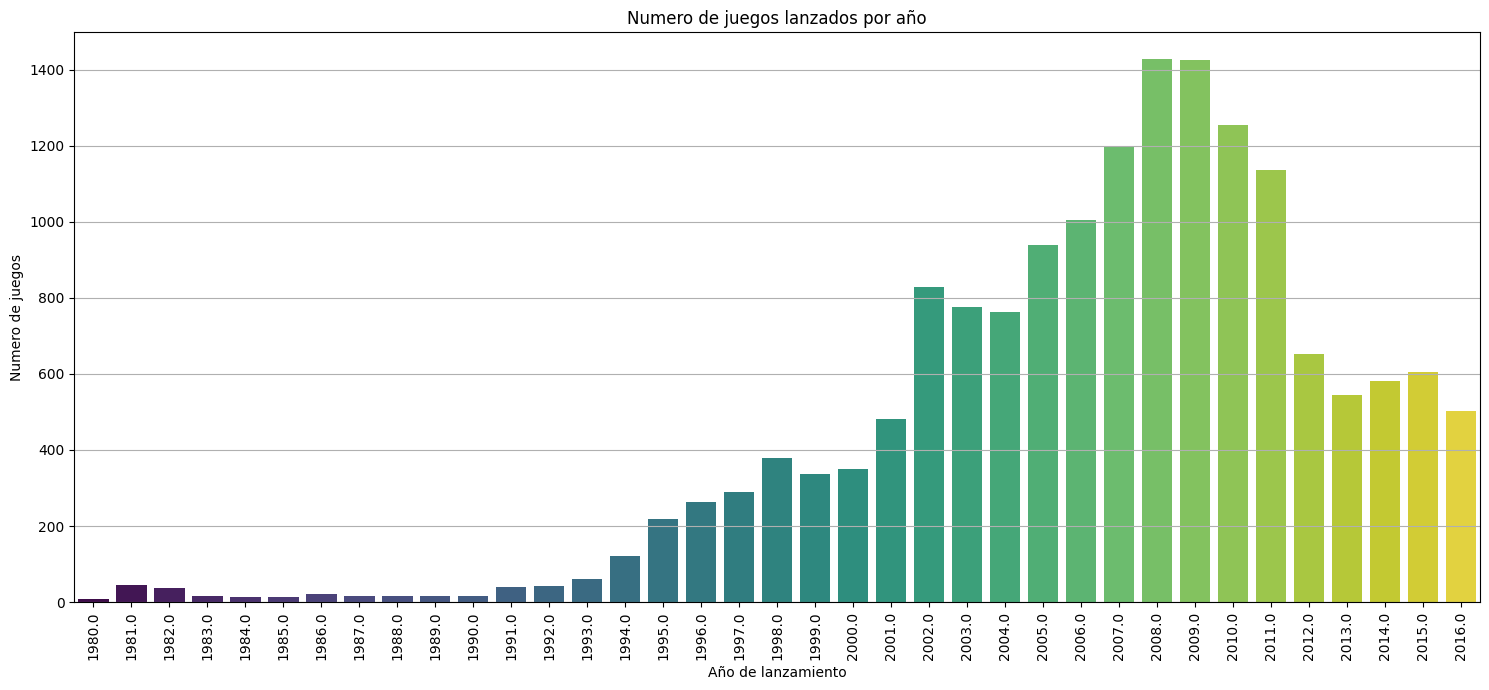

In [ ]:
#Hacemos un grafico de barras
plt.figure(figsize=(15, 7))
sns.barplot(x=games_per_year.index, y=games_per_year.values, hue=games_per_year.index, palette='viridis', legend=False)
plt.title('Numero de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Numero de juegos')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Ahora vamos a analizar el comportamiento de las plataformas de juego.


In [ ]:
#Calcular las ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por plataforma (en millones):")
display(platform_sales)

print()

#Identificamos las 10 plataformas con mayores ventas
top_platforms = platform_sales.head(10).index.tolist()
print(f"\nLas 10 plataformas con mayores ventas totales son: {top_platforms}")

#Filtramos el DataFrame para incluir solo las plataformas principales
top_platforms_df = df[df['platform'].isin(top_platforms)].copy() # Usamos.copy() para asegurarnos que sea una copia independiente

# Analizamos la distribución de ventas anuales para cada una de las plataformas principales
# Agrupamos por año y plataforma, sumar las ventas y luego desagrupar
platform_annual_sales = top_platforms_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()



Ventas totales por plataforma (en millones):


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53




Las 10 plataformas con mayores ventas totales son: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


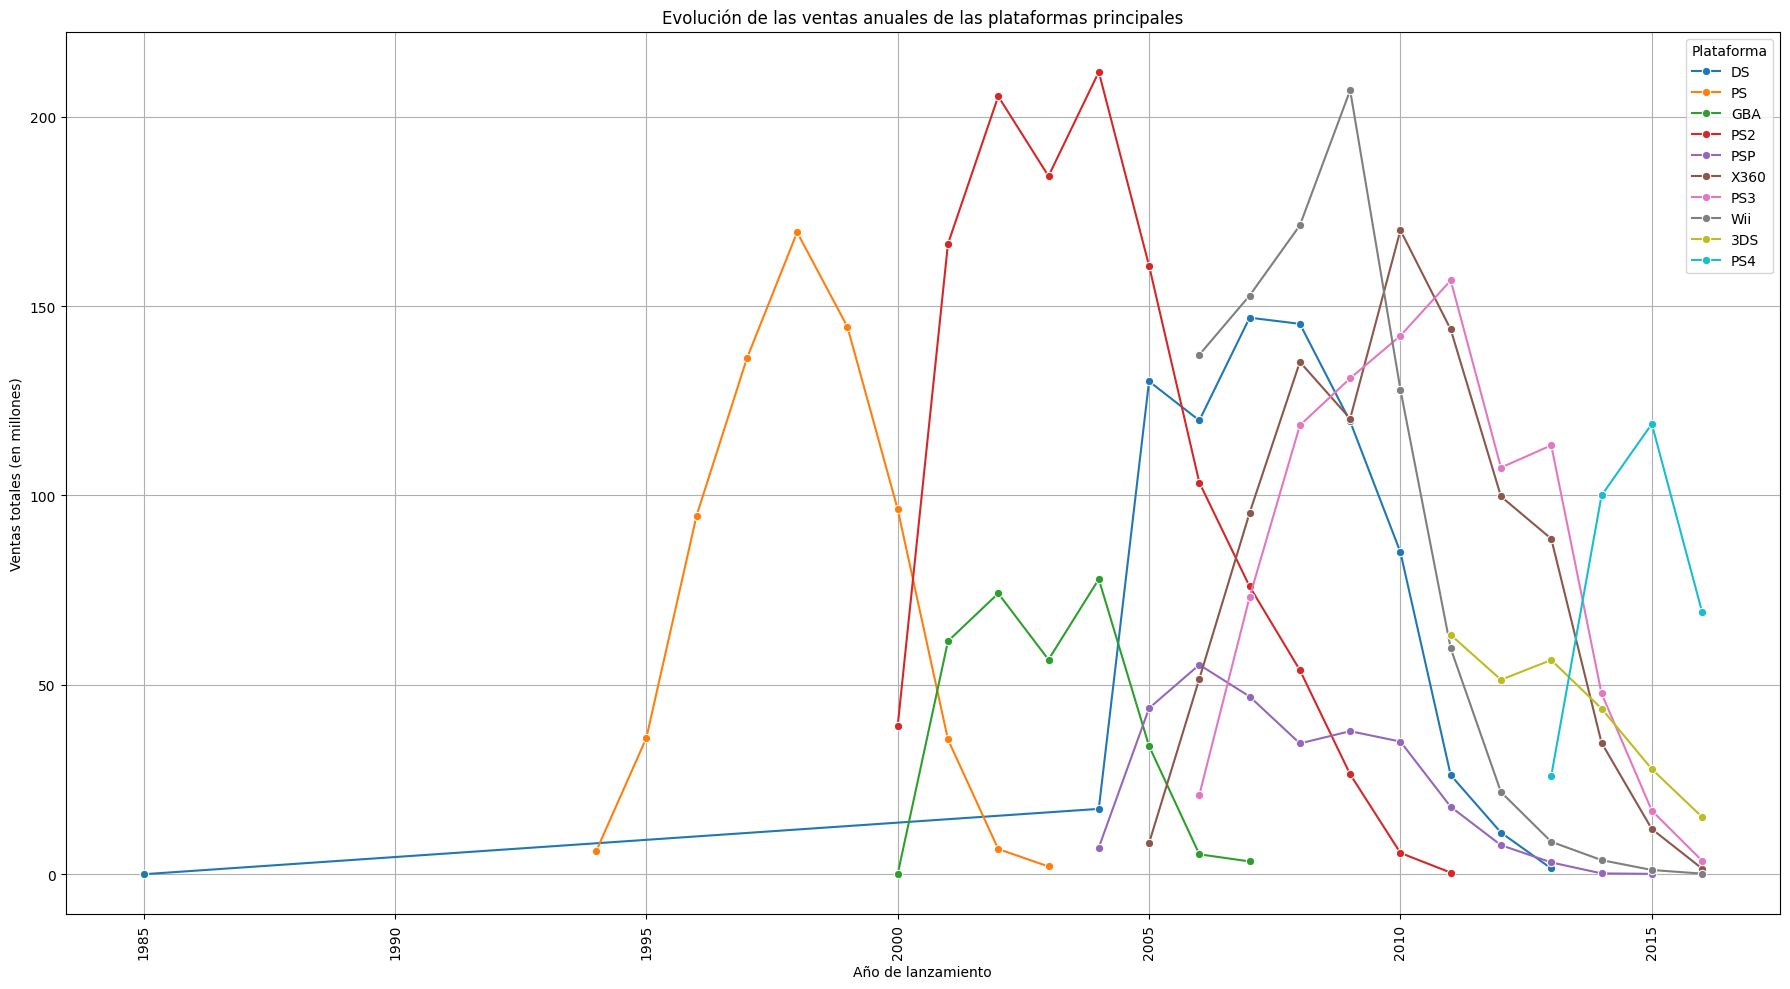

In [ ]:
#Creamos un gráfico de líneas para visualizar la evolución de las ventas anuales por plataforma
#Elegimos un grafico de lineas porque podemos ver la tendencia de esta variable continua a lo largo del tiempo
#Podemos ver su comportamiento a travez de lso años

plt.figure(figsize=(18, 10))
sns.lineplot(data=platform_annual_sales, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Evolución de las ventas anuales de las plataformas principales')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

## Vamos a analizar la evolucion de las plataformas.

- Cada generación tarda 3–4 años en alcanzar su máximo de ventas anuales, y luego pierde relevancia en 3–5 años.

- Hay solapamiento entre generaciones: cuando DS y PS2 caen, emergen Wii y X360; cuando X360 decae, PS4 y 3DS ya están subiendo.

Dado que queremos pronosticar las ventas de 2017 usando datos hasta 2016, conviene trabajar con:

- PS4 y 3DS, que estaban en plena curva ascendente en 2015–2016.

- X360 y PS3, que aún tenían volumen de mercado significativo hasta 2013–2014

In [ ]:
#Calculamos el primer y ultimo año con ventas para cada plataforma
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max'])

#Calculamos y mostramos el primer y ultimo año de ventas registradas y la duracion aproximada de la plataforma.
platform_lifespan['duration'] = platform_lifespan['max'] - platform_lifespan['min']
print("\nDuracion aproximada (años con ventas registradas) por plataforma:")
display(platform_lifespan.sort_values(by='duration', ascending=False))



Duracion aproximada (años con ventas registradas) por plataforma:


,min,max,duration
platform,,,
PC,1985.0,2016.0,31.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
NES,1983.0,1994.0,11.0
X360,2005.0,2016.0,11.0
PSP,2004.0,2015.0,11.0
PS2,2000.0,2011.0,11.0
PS3,2006.0,2016.0,10.0
DC,1998.0,2008.0,10.0


In [ ]:
#Definimos ahora el año de inicio para el periodo relevante
#Tomamos el 2010 porque segun los graficos vemos que las plataformas vigentes aun estan en auge
#Asimismo el volumen de videojuegos vigentes aun es bueno

start_year = 2010
#Filtramos el DataFrame para incluir solo los datos desde el año de inicio seleccionado
#Usamos .copy() para crear una copia explicita del subconjunto
relevant_data_df = df[df['year_of_release'] >= start_year].copy()

print(f"DataFrame original tenia {len(df)} filas.")
print(f"DataFrame filtrado para incluir datos desde el año {start_year} tiene {len(relevant_data_df)} filas.")
display(relevant_data_df.head())

print(f"\nInformacion del DataFrame filtrado:")
display(relevant_data_df.info())

DataFrame original tenia 16444 filas.
DataFrame filtrado para incluir datos desde el año 2010 tiene 5277 filas.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73



Informacion del DataFrame filtrado:
<class 'pandas.core.frame.DataFrame'>
Index: 5277 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5277 non-null   object 
 1   platform         5277 non-null   object 
 2   year_of_release  5277 non-null   float64
 3   genre            5277 non-null   object 
 4   na_sales         5277 non-null   float64
 5   eu_sales         5277 non-null   float64
 6   jp_sales         5277 non-null   float64
 7   other_sales      5277 non-null   float64
 8   critic_score     2312 non-null   float64
 9   user_score       2499 non-null   float64
 10  rating           3113 non-null   object 
 11  total_sales      5277 non-null   float64
dtypes: float64(8), object(4)
memory usage: 535.9+ KB


None

## Ahora un Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

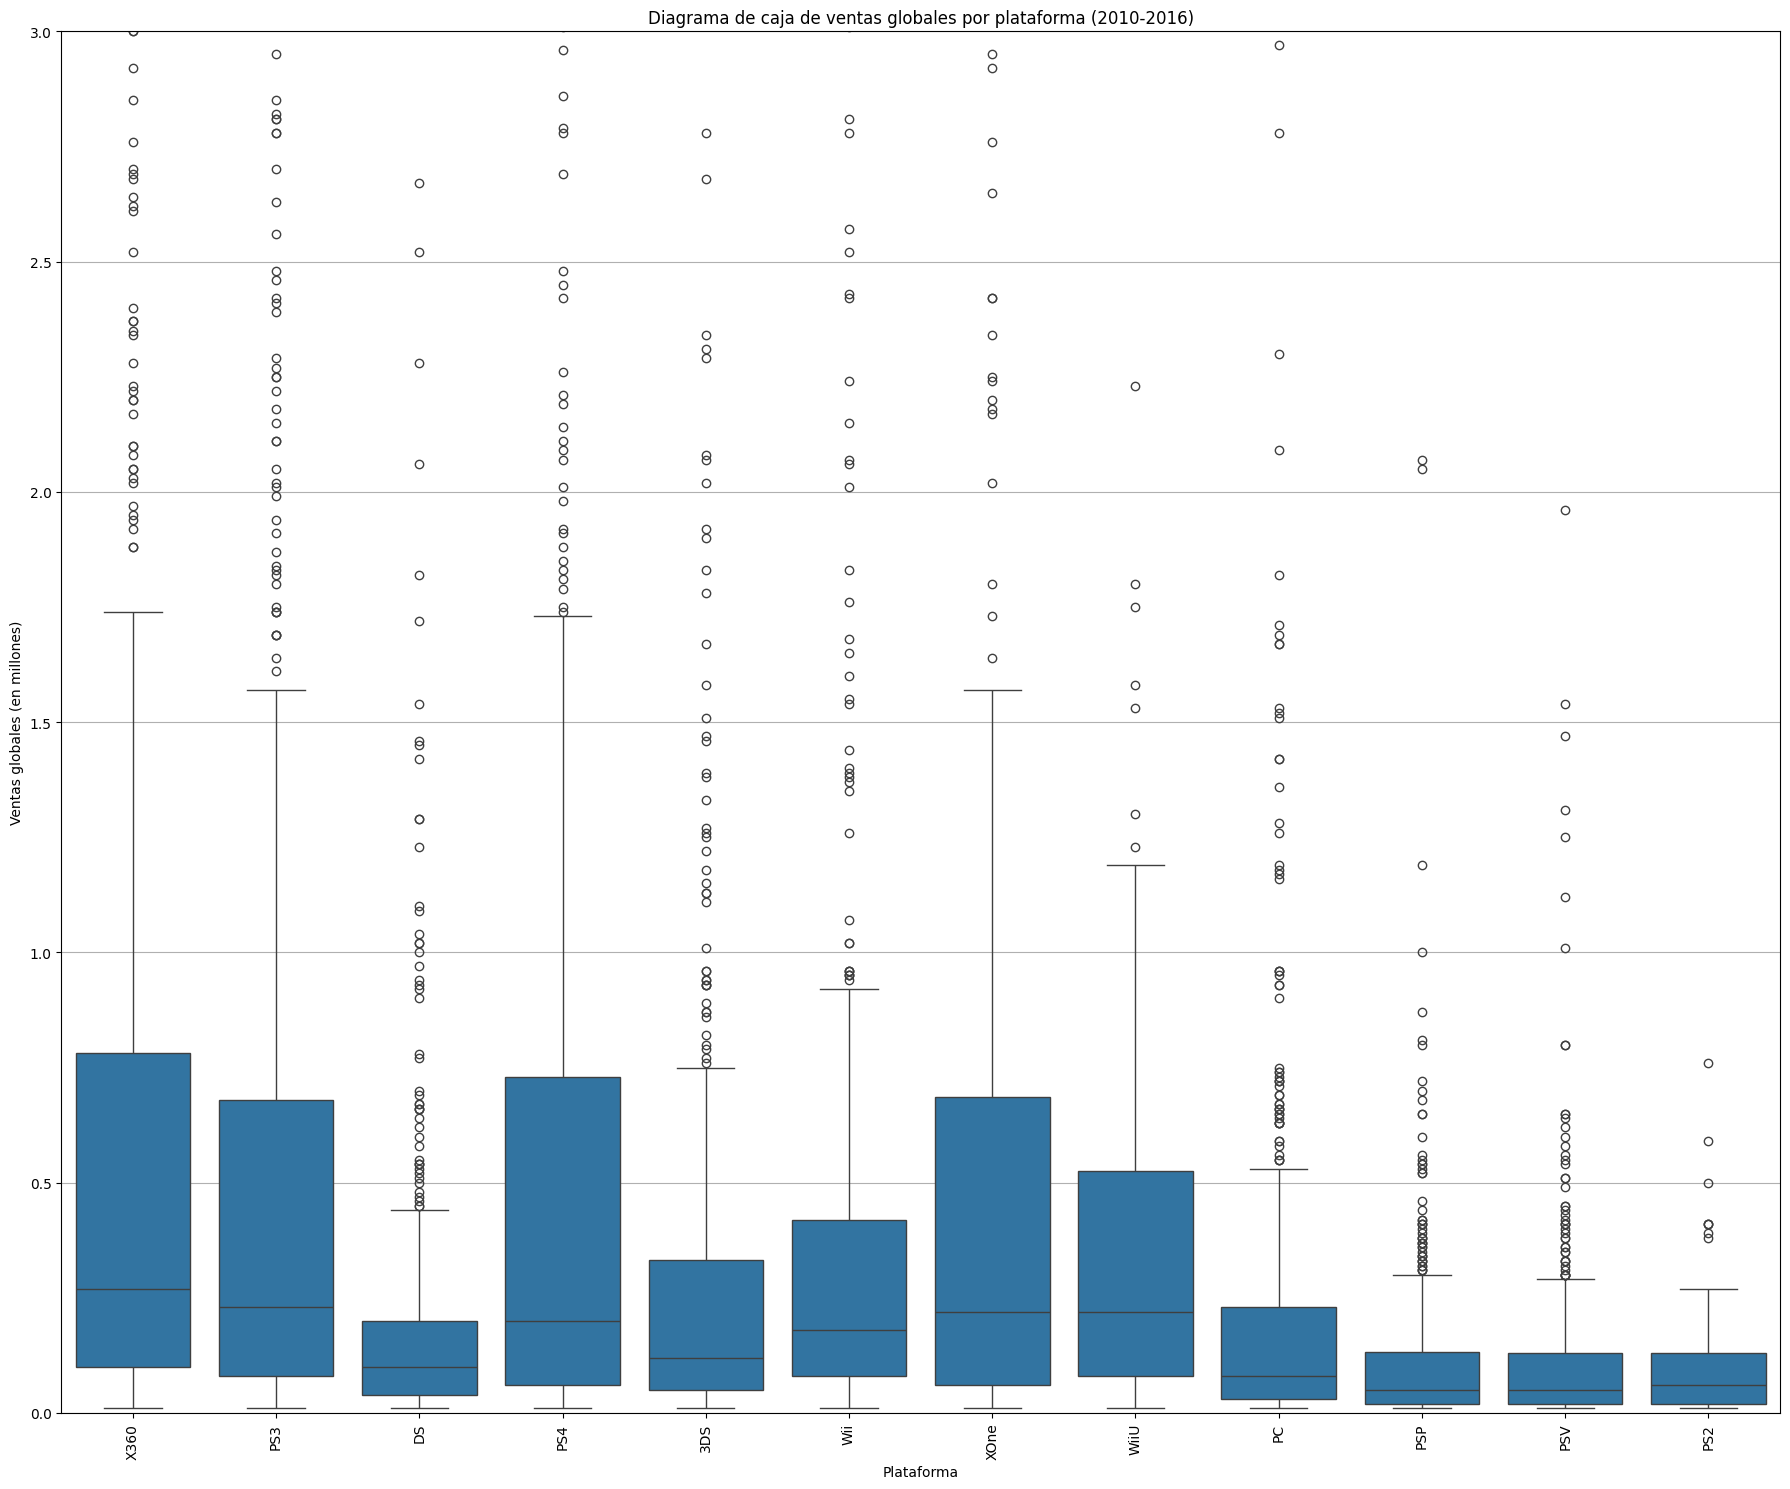

In [ ]:
# Crear un diagrama de caja para las ventas globales por plataforma en el periodo relevante
plt.figure(figsize=(18, 15))
sns.boxplot(data=relevant_data_df, x='platform', y='total_sales')
plt.title(f'Diagrama de caja de ventas globales por plataforma ({start_year}-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (en millones)')
plt.xticks(rotation=90)
plt.ylim(0, 3) # Limitar el eje Y para visualizar mejor la mayoria de los datos (ajustar si es necesario)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#Calculamos las ventas promedio por plataforma para el periodo relevante
average_platform_sales = relevant_data_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(f"\nVentas promedio por plataforma (en millones) para el periodo {start_year}-2016:")
display(average_platform_sales)

#Calculamos tambien la mediana de ventas por plataforma para el periodo relevante
median_platform_sales = relevant_data_df.groupby('platform')['total_sales'].median().sort_values(ascending=False)
print(f"\nMediana de ventas por plataforma (en millones) para el periodo {start_year}-2016:")
display(median_platform_sales)


Ventas promedio por plataforma (en millones) para el periodo 2010-2016:


,total_sales
platform,
X360,0.809426
PS4,0.801378
PS3,0.661125
XOne,0.645020
WiiU,0.559116
3DS,0.503535
Wii,0.495489
PC,0.254614
DS,0.244083



Mediana de ventas por plataforma (en millones) para el periodo 2010-2016:


,total_sales
platform,
X360,0.27
PS3,0.23
XOne,0.22
WiiU,0.22
PS4,0.20
Wii,0.18
3DS,0.12
DS,0.10
PC,0.08


## Conclusión de hallazgos
PS4 y Xbox One constituyen el auténtico "nucleo" de ventas en 2010–2016: se destacan por encima de cualquier otra plataforma tanto en ventas promedio como en variedad de éxitos.

PS3, Wii y 3DS todavia aportan volúmenes significativos, pero con un comportamiento más irregular.

PC, PSP, PS Vita y PS2 quedarían fuera de la estrategia “mainstream”: sus medianas son muy bajas que no valen la pena para futuro.

Podriamos confirmar que, para un modelo de predicción de ventas globales en 2017, convendria centrarse en las consolas de última generación y, en segundo plano, en las portátiles más recientes como el 3DS, descartando las que tengan ya un ciclo de vida muy avanzado.

Ahora vamos a analizar en base a las reseñas o criticas de los usuarios y criticos o reviewers de videojuegos profesionales. Para eso vamos a elegir una plataforma, en este caso la que tiene mejor potencial; la PS4

In [ ]:
#Elegimos una plataforma popular del periodo relevante.
platform_choice = 'PS4'

#Filtramos el DataFrame relevante para la plataforma elegida
# Usamos nuevamente .copy() para evitar errores o advertencias.
platform_df = relevant_data_df[relevant_data_df['platform'] == platform_choice].copy()
print(f"Numero de juegos de {platform_choice} en el periodo relevante ({start_year}-2016): {len(platform_df)}")


#Eliminamos filas donde falten puntuaciones para el analisis
#Esto es necesario porque no podemos graficar o calcular correlacion sin los valores de reseña y venta.
platform_df_scored = platform_df.dropna(subset=['critic_score', 'user_score', 'total_sales']).copy()
print(f"Numero de juegos de {platform_choice} con Critic_Score, User_Score y Total_Sales disponibles: {len(platform_df_scored)}")




Numero de juegos de PS4 en el periodo relevante (2010-2016): 392
Numero de juegos de PS4 con Critic_Score, User_Score y Total_Sales disponibles: 249


### Analisis de Critic score vs Ventas


Analisis de Critic Score vs Ventas:


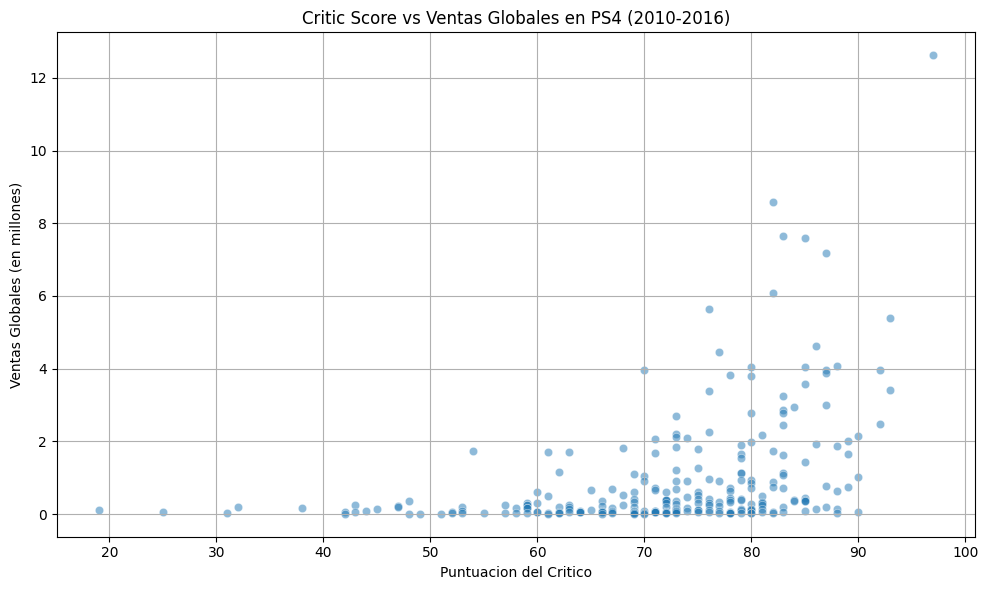


 Correlacion entre Critic Score y Ventas Globales en PS4: 0.41


In [ ]:
#Como hay una buena cantidad de juegos con reseñas, vamos a visualizar con graficos.

#Creamos grafico de dispersion para Critic Score vs Ventas globales
#Utilizamos un diagrama de dispersión para visualizar la relación entre las puntuaciones de las reseñas y las ventas totales
#Permite ver la tendencia, la dispersión y la presencia de valores inusuales, lo cual es fundamental para interpretar correctamente la posible influencia de las reseñas en las ventas de juegos.
print("\nAnalisis de Critic Score vs Ventas:")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=platform_df_scored, x='critic_score', y='total_sales', alpha=0.5)
plt.title(f'Critic Score vs Ventas Globales en {platform_choice} ({start_year}-2016)')
plt.xlabel('Puntuacion del Critico')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular la correlacion entre Critic Score y Ventas globales
# Usamos .corr() que ignora automaticamente los NaN si los hubiera,
critic_sales_correlation = platform_df_scored['critic_score'].corr(platform_df_scored['total_sales'])
print(f"\n Correlacion entre Critic Score y Ventas Globales en {platform_choice}: {critic_sales_correlation:.2f}")


Observaciones:

- A grandes rasgos, a medida que sube la puntuación de la crítica, también tienden a subir las ventas globales. La nube de puntos tiene un recorrido en diagonal hacia la derecha.
- Alta variabilidad: dentro de cada banda de puntuación, hay títulos que apenas venden 0.1 millones y otros que superan los 5 millones; esto indica que un alto critic score es necesario para tener buen exito, pero no suficiente; influyen otros factores.

En resumen: hay una relación positiva clara entre la calidad percibida por la crítica y las ventas, pero con mucha variabilidad que sugiere la necesidad de enriquecer o complementar el modelo con más factores además del critic_score...
Ahora vamos a ver el user_score.

Ahora analizamos User Score vs ventas


Analisis de User Score vs Ventas:


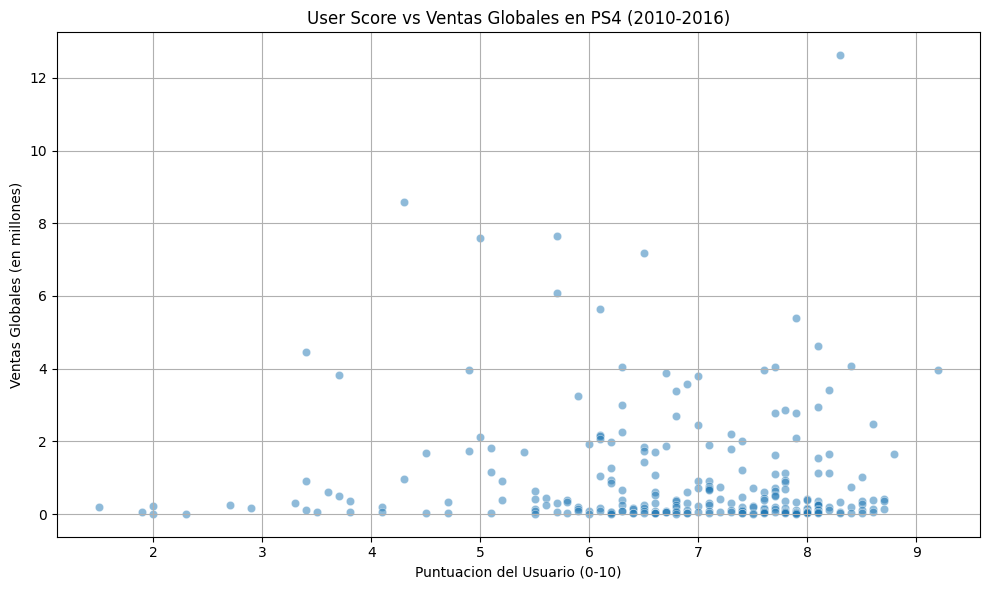

Correlacion entre User Score y Ventas Globales en PS4: -0.03


In [ ]:
print("\nAnalisis de User Score vs Ventas:")

# Crear grafico de dispersion para User Score vs Ventas globales
# user_score es de 0-10, critic_score de 0-100. Los graficamos en sus escalas originales.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=platform_df_scored, x='user_score', y='total_sales', alpha=0.5)
plt.title(f'User Score vs Ventas Globales en {platform_choice} ({start_year}-2016)')
plt.xlabel('Puntuacion del Usuario (0-10)')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular la correlacion entre User Score y Ventas globales
user_sales_correlation = platform_df_scored['user_score'].corr(platform_df_scored['total_sales'])
print(f"Correlacion entre User Score y Ventas Globales en {platform_choice}: {user_sales_correlation:.2f}")



Observaciones:

- Vemos una relación más débil y muy dispersa
A diferencia del gráfico de crítica en donde la nube mostraba un claro recorrido o tendencia ascendente, aquí los puntos están más dispersos a lo largo de toda la banda de ventas.
Hay títulos con User Score bajo que a veces llegan a 5 o 8 millones y títulos con User Score alto que venden menos de 0.5 millones
Esto produce una correlación típica de usuario de –0.3, mucho menor que la ≈ 0.4 de Critic Score.
- Tenemos poca capacidad predictiva
Un user Score elevado no garantiza ventas altas probablemente porque influyen demasiados factores en la opinion del usuario pero; en cambio un User Score malo sí suele descartar que un juego sea éxitoso porque casi ninguno de los juegos con puntuaciones menores de 4 supera 1 M de ventas.

En comparacion con critic_score:
Critic Score ofrece un mejor filtro y predice un mayor porcentaje de la variación de ventas.

User Score es más reactivo a tendencias tardías u otros factores quizas "emocionales", por eso influye menos en el pico inicial de ventas.

## Comparacion de ventas de videojuegos en otras plataformas.

In [ ]:
relevant_data_df.columns = [c.lower() for c in relevant_data_df.columns]

#Creamos una nueva columna de ventas totales en base al periodo del 2010-
relevant_data_df['sales_total'] = relevant_data_df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1) # Línea 2

#Filtramos para PS4 y obtenemos el top-10 por ventas
ps4 = relevant_data_df[relevant_data_df.platform=='PS4']
top10_ps4 = ps4.nlargest(10, 'sales_total')['name']

#Hacemos un Pivot table de esos títulos en todas las plataformas
comp = (
    relevant_data_df[relevant_data_df.name.isin(top10_ps4)] #Filtrar el DataFrame original por los nombres del top 10 de PS4
    .groupby(['name','platform'])['sales_total'] #Agrupar por nombre y plataforma y sumar las ventas
    .sum() #Realizar la suma
    .reset_index() #Convertir el resultado agrupado a DataFrame
    .pivot(index='name', columns='platform', values='sales_total') #Crear tabla pivote
    .fillna(0) #Rellenar NaNs con 0
)

#Mostramos los resultados
print(comp)


platform                         3DS    PC    PS3    PS4  PSV   Wii   X360  \
name                                                                         
Call of Duty: Advanced Warfare  0.00  0.41   4.36   7.66  0.0  0.00   4.28   
Call of Duty: Black Ops 3       0.00  0.26   1.69  14.63  0.0  0.00   1.70   
Destiny                         0.00  0.00   1.61   5.64  0.0  0.00   1.92   
FIFA 15                         0.46  0.29   4.28   6.08  0.6  0.56   2.92   
FIFA 16                         0.00  0.20   2.70   8.58  0.0  0.00   1.57   
FIFA 17                         0.00  0.12   0.73   7.60  0.0  0.00   0.38   
Fallout 4                       0.00  1.28   0.00   7.17  0.0  0.00   0.00   
Grand Theft Auto V              0.00  1.17  21.05  12.62  0.0  0.00  16.27   
Star Wars Battlefront (2015)    0.00  0.55   0.00   7.98  0.0  0.00   0.00   
Uncharted 4: A Thief's End      0.00  0.00   0.00   5.39  0.0  0.00   0.00   

platform                        XOne  
name                    

Observaciones:

Al comparar los mismos juegos entre plataformas, vemos claramente que:

- PS4 sigue siendo el mercado prioritario para la tienda

- XOne es un segundo 'nicho' muy rentable.

- PC atrae poco a grandes sagas sin un plan de marketing específico para esta area

- Las Generaciones anteriores como PS3/X360 aún aportan algo de ventas, pero su vida útil está en fase de bajada y debe gestionarse tal vez con estrategias de rebajas.

Estas visualizaciones nos permiten optimizar la asignación de presupuesto, decidir estrategias de precios o promociones.

### Distribucion general de los juegos por genero/Metricas estadisticas

           genre  total_sales  average_sales  median_sales  n_games
0         Action       673.09       0.450227         0.140     1495
1        Shooter       479.74       1.170098         0.385      410
2         Sports       328.39       0.571113         0.200      575
3   Role-Playing       315.28       0.555070         0.150      568
4           Misc       234.56       0.407222         0.130      576
5         Racing       122.68       0.517637         0.170      237
6       Platform       119.72       0.782484         0.210      153
7       Fighting        81.59       0.410000         0.180      199
8     Simulation        71.75       0.330645         0.100      217
9      Adventure        61.00       0.108348         0.030      563
10      Strategy        35.84       0.210824         0.080      170
11        Puzzle        20.60       0.180702         0.070      114


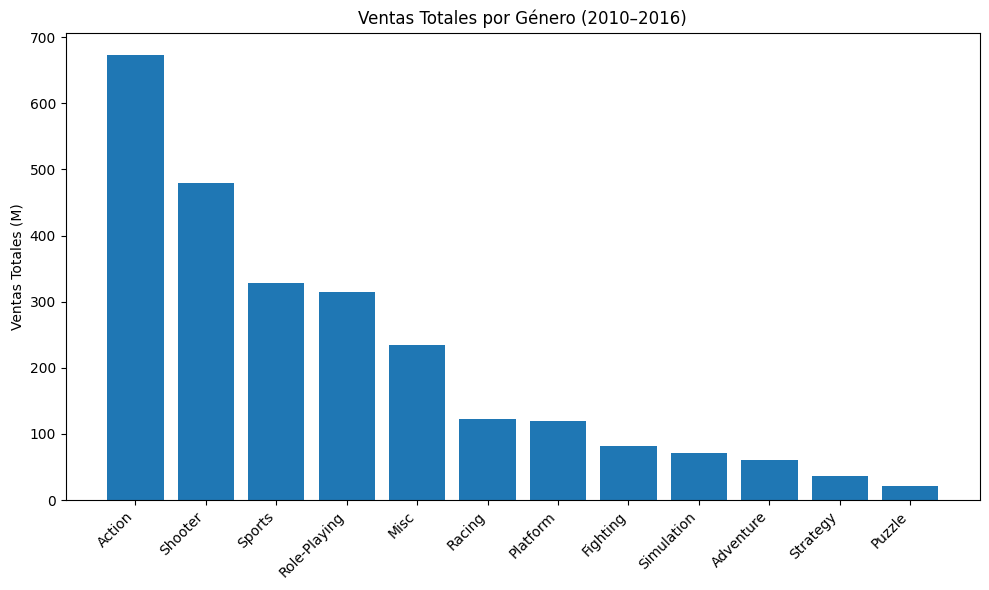

In [ ]:

#Calculamos las ventas totales
relevant_data_df['sales_total'] = relevant_data_df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

#Agrupamos por género y obtenemos sus métricas
genre_stats = (
    relevant_data_df
    .groupby('genre')['sales_total']
    .agg(total_sales='sum',
         average_sales='mean',
         median_sales='median',
         n_games='count')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)

print(genre_stats)

#Gráfico de barras de ventas totales por género
plt.figure(figsize=(10,6))
plt.bar(genre_stats['genre'], genre_stats['total_sales'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ventas Totales (M)')
plt.title('Ventas Totales por Género (2010–2016)')
plt.tight_layout()
plt.show()

Observaciones:

- Action domina en volumen total, pero con menor ingreso medio por juego 0.45 millones debido al gran número de lanzamientos. Aun así, es indispensable en tu catálogo.
- Shooter tiene un ingreso promedio muy alto 1.17 millonesy mediana sólida 0.385 millones: pocos títulos generan la mayor parte de las ventas. Aquí conviene apostar a franquicias consolidadas como Call of Duty y Battlefield
- Sports sale muy rentable 0.57 millones por juego gracias a subsecuentes secuelas anuales, con dependencia de licencias.

En resumen, la estrategia de catálogo debe combinar:
- Volumen y consistencia con Action/Shooter/Sports.
- Rentabilidad por unidad con RPG/Platform.
- Costos bajos para géneros minoritarios Puzzle, Strategy y Adventure.

# Perfil de usuario para cada region

In [ ]:
#Hacemos una lista con las olumnas de ventas regionales
regional_cols = ['na_sales', 'eu_sales', 'jp_sales']

#Sacamos el top 5 Plataformas y cuota de mercado iterando en la lista con un bucle
for region in regional_cols:
    total = relevant_data_df[region].sum()
    plat_sales = relevant_data_df.groupby('platform')[region].sum().sort_values(ascending=False)
    share = (plat_sales / total * 100).round(2)
    print(f"\nTop 5 Plataformas en {region.upper()}:")
    print(pd.DataFrame({'sales': plat_sales, 'share_%': share}).head(5))

# Sacamos el top 5 Géneros y cuota de mercado
for region in regional_cols:
    total = relevant_data_df[region].sum()
    genre_sales = relevant_data_df.groupby('genre')[region].sum().sort_values(ascending=False)
    share = (genre_sales / total * 100).round(2)
    print(f"\nTop 5 Géneros en {region.upper()}:")
    print(pd.DataFrame({'sales': genre_sales, 'share_%': share}).head(5))

#Vemos el impacto de Rating ESRB: ventas promedio por rating
rating_df = relevant_data_df.dropna(subset=['rating']).copy()
for region in regional_cols:
    mean_sales = rating_df.groupby('rating')[region].mean().sort_values(ascending=False).round(2)
    print(f"\nVentas promedio por Rating en {region.upper()}:")
    print(mean_sales)


Top 5 Plataformas en NA_SALES:
           sales  share_%
platform                 
X360      334.18    29.56
PS3       229.25    20.28
Wii       121.20    10.72
PS4       108.74     9.62
XOne       93.12     8.24

Top 5 Plataformas en EU_SALES:
           sales  share_%
platform                 
PS3       213.60    25.39
X360      163.41    19.43
PS4       141.09    16.77
PC         68.82     8.18
Wii        65.91     7.84

Top 5 Plataformas en JP_SALES:
           sales  share_%
platform                 
3DS       100.62    32.98
PS3        59.26    19.42
PSP        42.20    13.83
DS         27.90     9.14
PSV        21.84     7.16

Top 5 Géneros en NA_SALES:
               sales  share_%
genre                        
Action        290.64    25.71
Shooter       237.47    21.01
Sports        156.81    13.87
Misc          123.80    10.95
Role-Playing  112.05     9.91

Top 5 Géneros en EU_SALES:
               sales  share_%
genre                        
Action        233.63    27.77
Sh

## Graficamos los resultados.

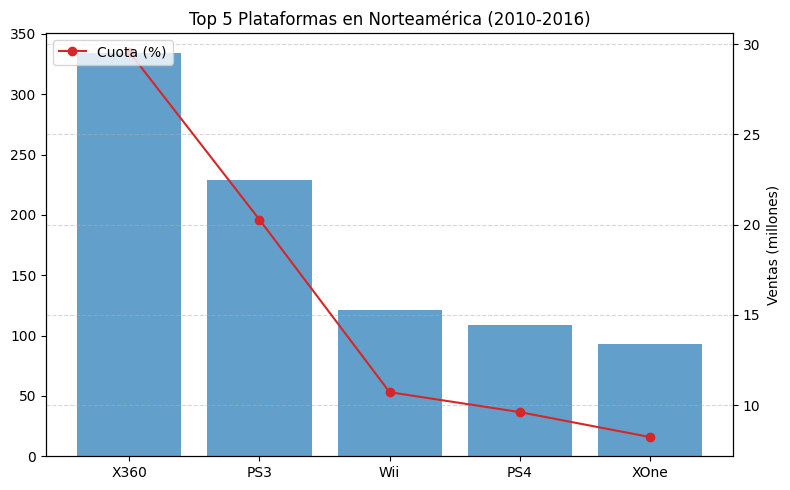

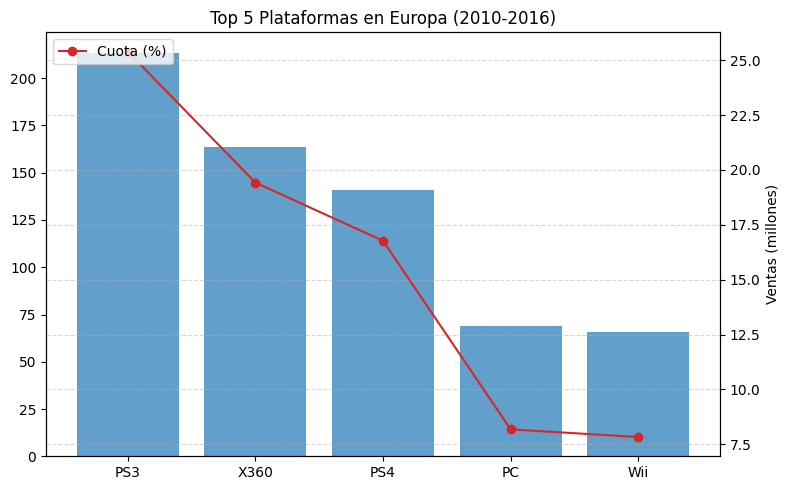

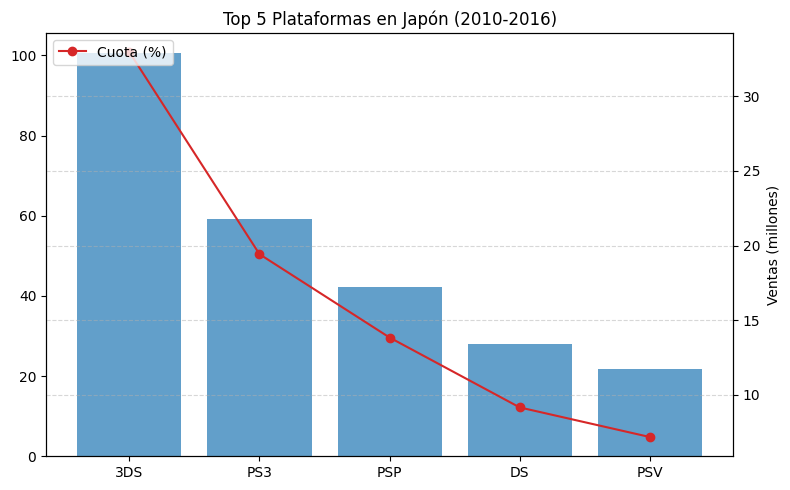

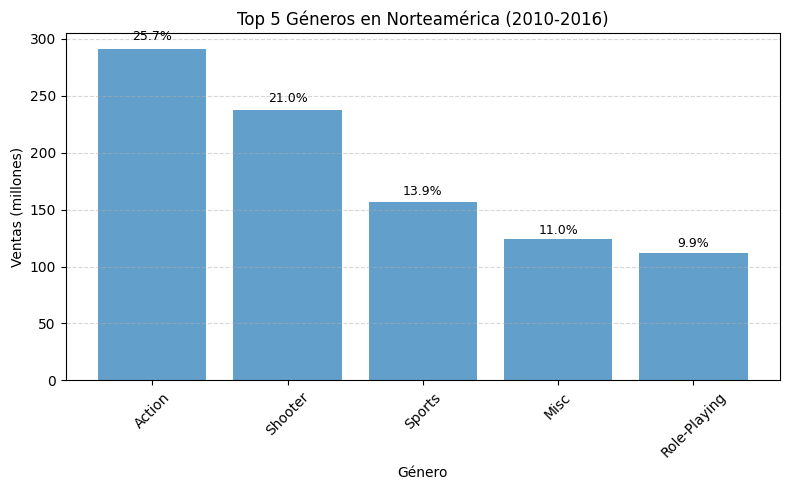

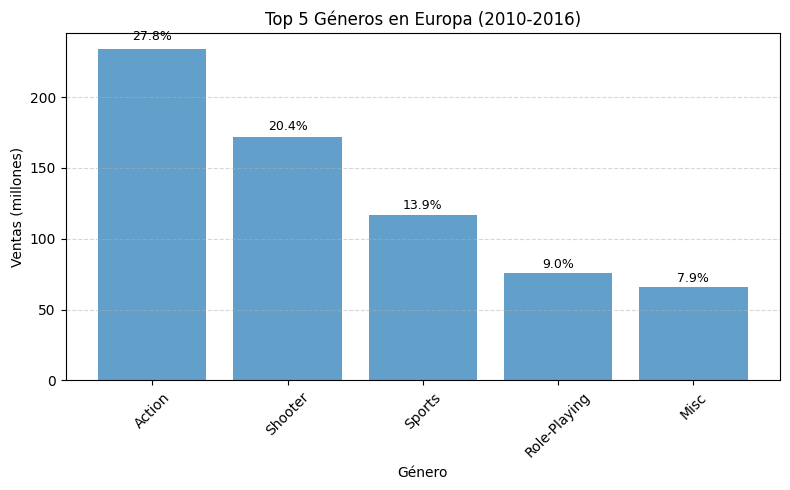

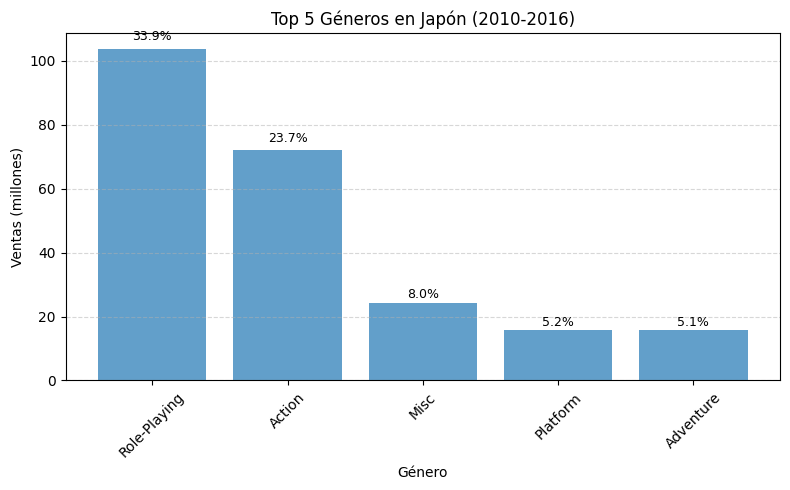

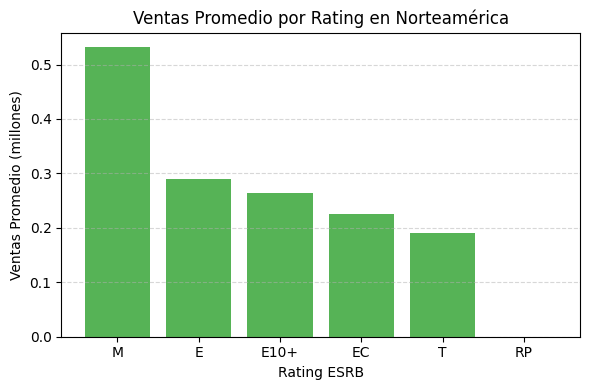

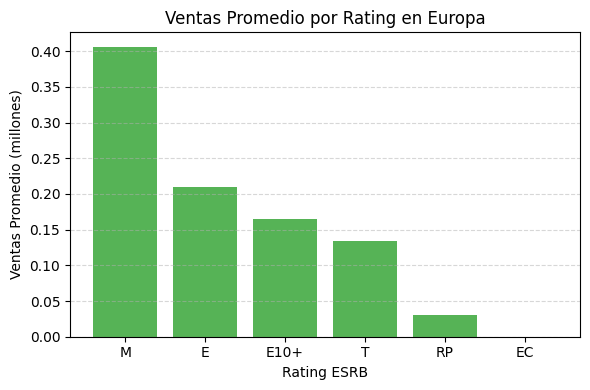

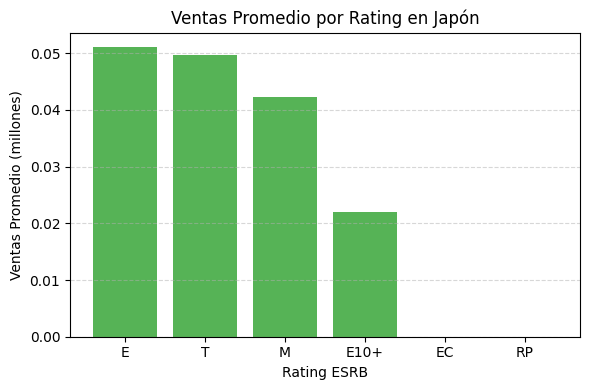

In [ ]:
#Definimos nuestras regiones y etiquetas
regional_cols = ['na_sales', 'eu_sales', 'jp_sales']
region_names = {'na_sales':'Norteamérica', 'eu_sales':'Europa', 'jp_sales':'Japón'}

#Gráficamos el Top 5 de Plataformas iterando sobre las listas
for region in regional_cols:
    # Recalcular para asegurarnos
    total = relevant_data_df[region].sum()
    plat = relevant_data_df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    share = plat / total * 100

    #Grafico de barras
    plt.figure(figsize=(8,5))
    plt.bar(plat.index, plat.values, alpha=0.7, label='Ventas (M)')
    plt.twinx().plot(share.index, share.values, '-o', color='C3', label='Cuota (%)')
    plt.title(f'Top 5 Plataformas en {region_names[region]} ({start_year}-2016)')
    plt.xlabel('Plataforma')
    plt.xticks(rotation=45)
    plt.ylabel('Ventas (millones)')
    plt.legend(loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

#Gráficamos el Top 5 para Géneros de la misma manera
for region in regional_cols:
    total = relevant_data_df[region].sum()
    genre = relevant_data_df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    share = genre / total * 100

    plt.figure(figsize=(8,5))
    bars = plt.bar(genre.index, genre.values, alpha=0.7)
    for bar, pct in zip(bars, share.round(1)):
        plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()*1.02,
                 f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.title(f'Top 5 Géneros en {region_names[region]} ({start_year}-2016)')
    plt.xlabel('Género')
    plt.ylabel('Ventas (millones)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

#Gráficamos las Ventas promedio por Rating ESRB
rating_df = relevant_data_df.dropna(subset=['rating'])
for region in regional_cols:
    mean_sales = rating_df.groupby('rating')[region].mean().sort_values(ascending=False)

    plt.figure(figsize=(6,4))
    plt.bar(mean_sales.index, mean_sales.values, color='C2', alpha=0.8)
    plt.title(f'Ventas Promedio por Rating en {region_names[region]}')
    plt.xlabel('Rating ESRB')
    plt.ylabel('Ventas Promedio (millones)')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Observaciones:

- Analisis Top 5 Plataformas
Se pudieron observar diferencias en los gustos en plataformas y juegos; NA y EU por ejemplo prefieren consolas como Xbox y PlayStation y en juegos optan mas por juegos de accion y Shooter. En cambio Japon tiene un perfil de mercado diferente; optan mas por plataformas portatiles como la 3DS de nintendo y en juegos los que son tipo Roleplay tienen la ventaja marcada sobre los de accion o deportes.
Esto subraya la necesidad de estrategias específicas por región en cuanto a la selección de plataformas y juegos para campañas publicitarias.

- Si las clasificaciones ESRB afectan las ventas.
Sí, las clasificaciones de ESRB parecen afectar las ventas y la distribución del mercado en las regiones individuales, especialmente en NA y EU, donde los juegos con clasificación "M" constituyen una parte muy importante del mercado por volumen de ventas. En Japón, la influencia es menos directa en términos del sistema ESRB, pero las ventas por clasificación reportada aun reflejan las preferencias de género y público de esa región.

Este análisis del perfil de usuario por región es valioso para adaptar las estrategias de marketing y la selección de catálogo. Nos permite saber, por ejemplo, que una campaña para un Shooter clasificado "M" probablemente tendrá más impacto en NA y EU que en JP, mientras que un RPG con clasificación "E" o "T" podría ir mucho mejor para Japón.

# Prueba de Hipotesis

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [ ]:
#Prueba de Hipotesis 1: Calificaciones promedio de usuarios en Xbox One vs PC

print("\nPrueba de Hipotesis 1: Xbox One vs PC Calificacion Promedio de Usuarios ")

#Filtramos los datos de user_score para Xbox One y PC en el periodo relevante
#Manejamos los valores NaN en user_score, ya que la prueba t los ignora.
xboxone_user_scores = relevant_data_df[relevant_data_df['platform'] == 'XOne']['user_score'].dropna()
pc_user_scores = relevant_data_df[relevant_data_df['platform'] == 'PC']['user_score'].dropna()

print(f"\nEl Numero de juegos con user_score en XOne: {len(xboxone_user_scores)}")
print(f"El Numero de juegos con user_score en PC: {len(pc_user_scores)}")

#Verificamos si hay suficientes datos para la prueba por si hubiesen pocos
if len(xboxone_user_scores) < 2 or len(pc_user_scores) < 2:
    print("\nADVERTENCIA: No hay suficientes datos de user_score para realizar la prueba t en una o ambas plataformas.")
else:
    # Realizamos la prueba de Levene para igualdad de varianzas
    levene_test = stats.levene(xboxone_user_scores, pc_user_scores)
    print("\nResultado de la Prueba de Levene para igualdad de varianzas:")
    print(f"Estadistica Levene: {levene_test.statistic:.4f}")
    print(f"Valor p de Levene: {levene_test.pvalue:.4f}")

    # Interpretamos el resultado de Levene para decidir el parametro equal_var
    alpha = 0.05
    equal_variances = levene_test.pvalue > alpha

    if equal_variances:
        print("\nConclusion de Levene: No hay suficiente evidencia para rechazar la hipotesis de varianzas iguales. Usaremos equal_var=True.")
    else:
        print("\nConclusion de Levene: Rechazamos la hipotesis de varianzas iguales. Usaremos equal_var=False (Prueba t de Welch).")

    #Realizamos entonces la prueba t de Student para muestras independientes
    ttest_xone_pc = stats.ttest_ind(xboxone_user_scores, pc_user_scores, equal_var=False )

    print("\nEl resultado de la Prueba t Xbox One vs PC user_score es:")
    print(f"Estadistica t: {ttest_xone_pc.statistic:.4f}") #Imprimimos la estadistica calculada
    print(f"Valor p: {ttest_xone_pc.pvalue:.4f}")

    # Interpretar el resultado de la prueba t
    if ttest_xone_pc.pvalue < alpha:
        print(f"Conclusion: El valor p ({ttest_xone_pc.pvalue:.4f}) es menor que alfa ({alpha}).")
        print("Rechazamos la hipotesis nula.")
        print("Hay evidencia estadisticamente significativa para concluir que las calificaciones promedio de los usuarios para Xbox One y PC son DIFERENTES en el periodo relevante.")
    else:
        print(f"Conclusion: El valor p ({ttest_xone_pc.pvalue:.4f}) es mayor o igual que alfa ({alpha}).")
        print("No rechazamos la hipotesis nula.")
        print("No hay suficiente evidencia estadisticamente significativa para concluir que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes en el periodo relevante.")


Prueba de Hipotesis 1: Xbox One vs PC Calificacion Promedio de Usuarios 

El Numero de juegos con user_score en XOne: 182
El Numero de juegos con user_score en PC: 374

Resultado de la Prueba de Levene para igualdad de varianzas:
Estadistica Levene: 4.5185
Valor p de Levene: 0.0340

Conclusion de Levene: Rechazamos la hipotesis de varianzas iguales. Usaremos equal_var=False (Prueba t de Welch).

El resultado de la Prueba t Xbox One vs PC user_score es:
Estadistica t: 0.0249
Valor p: 0.9802
Conclusion: El valor p (0.9802) es mayor o igual que alfa (0.05).
No rechazamos la hipotesis nula.
No hay suficiente evidencia estadisticamente significativa para concluir que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes en el periodo relevante.


In [ ]:
#Prueba de Hipotesis 2: Calificaciones promedio de usuarios en Genero Accion vs Deportes
print("Prueba de Hipotesis 2: Genero Accion vs Deportes Calificacion Promedio de Usuarios")

#Filtramos los datos de user_score para Genero Accion y Genero Deportes en el periodo relevante
#De paso manejamos los ausentes.
action_user_scores = relevant_data_df[relevant_data_df['genre'] == 'Action']['user_score'].dropna()
sports_user_scores = relevant_data_df[relevant_data_df['genre'] == 'Sports']['user_score'].dropna()

print(f"\nEl Numero de juegos con user_score en Genero Accion: {len(action_user_scores)}")
print(f"El Numero de juegos con user_score en Genero Deportes: {len(sports_user_scores)}")

#Verificamos siempre si hay suficientes datos para la prueba
if len(action_user_scores) < 2 or len(sports_user_scores) < 2:
     print("\nADVERTENCIA: No hay suficientes datos de user_score para realizar la prueba t en uno o ambos generos.")
else:
    # Realizamos la prueba de Levene para igualdad de varianzas
    levene_test = stats.levene(action_user_scores, sports_user_scores)
    print("\nResultado de la Prueba de Levene para igualdad de varianzas:")
    print(f"Estadistica Levene: {levene_test.statistic:.4f}")
    print(f"Valor p de Levene: {levene_test.pvalue:.4f}")

    # Interpretamos el resultado de Levene para decidir el parametro equal_var
    alpha = 0.05
    equal_variances = levene_test.pvalue > alpha

    if equal_variances:
        print("\nConclusion de Levene: No hay suficiente evidencia para rechazar la hipotesis de varianzas iguales. Usaremos equal_var=True.")
    else:
        print("\nConclusion de Levene: Rechazamos la hipotesis de varianzas iguales. Usaremos equal_var=False (Prueba t de Welch).")

    #Realizamos la prueba t de Student para muestras independientes si no la prueba t de Welch
    ttest_action_sports = stats.ttest_ind(action_user_scores, sports_user_scores, equal_var=False)

    print("\nEl resultado de la Prueba t Genero Accion vs Deportes user_score:")
    print(f"Estadistica t: {ttest_action_sports.statistic:.4f}")
    print(f"Valor p: {ttest_action_sports.pvalue:.4f}")

    # Interpretar el resultado de la prueba t
    print(f"\nEl Nivel de significancia es: {alpha}")
    if ttest_action_sports.pvalue < alpha:
        print(f"Conclusion: El valor p ({ttest_action_sports.pvalue:.4f}) es menor que alfa ({alpha}).")
        print("Rechazamos la hipotesis nula.")
        print("Hay evidencia estadisticamente significativa para concluir que las calificaciones promedio de los usuarios para los generos Accion y Deportes son DIFERENTES en el periodo relevante.")
    else:
        print(f"Conclusion: El valor p ({ttest_action_sports.pvalue:.4f}) es mayor o igual que alfa ({alpha}).")
        print("No rechazamos la hipotesis nula.")
        print("No hay suficiente evidencia estadisticamente significativa para concluir que las calificaciones promedio de los usuarios para los generos Accion y Deportes son diferentes en el periodo relevante.")

Prueba de Hipotesis 2: Genero Accion vs Deportes Calificacion Promedio de Usuarios

El Numero de juegos con user_score en Genero Accion: 779
El Numero de juegos con user_score en Genero Deportes: 315

Resultado de la Prueba de Levene para igualdad de varianzas:
Estadistica Levene: 19.1509
Valor p de Levene: 0.0000

Conclusion de Levene: Rechazamos la hipotesis de varianzas iguales. Usaremos equal_var=False (Prueba t de Welch).

El resultado de la Prueba t Genero Accion vs Deportes user_score:
Estadistica t: 8.2532
Valor p: 0.0000

El Nivel de significancia es: 0.05
Conclusion: El valor p (0.0000) es menor que alfa (0.05).
Rechazamos la hipotesis nula.
Hay evidencia estadisticamente significativa para concluir que las calificaciones promedio de los usuarios para los generos Accion y Deportes son DIFERENTES en el periodo relevante.


### Criterio utilizado para probar las hipótesis y por qué:

Criterio: Utilizamos la prueba t de Student para muestras independientes. Específicamente, la implementación que usamos (scipy.stats.ttest_ind con equal_var=False) realiza la prueba t de Welch, que es una variación más robusta en caso de ser necesario.

Por qué: Esta prueba es el criterio estándar y apropiado por las siguientes razones:
- Tipo de Datos: Estamos comparando una variable numérica continua.
- Número de Grupos: Estamos comparando exactamente dos grupos; uno contra el otro.
- Independencia de Grupos: Los grupos son independientes. Por ejemplo, un juego es de género Acción o de género Deportes, no ambos a la vez en nuestro análisis.
- Prueba de Medias: El objetivo es comparar las medias de la variable numérica entre estos dos grupos.
Y la prueba t precisamente calcula una estadística (el valor t) que mide la diferencia entre las medias de los dos grupos en relación con la variabilidad dentro de los grupos.

Nuestro criterio de decisión es comparar este valor p con nuestro nivel de significancia alfa (α = 0.05)

### Conclusión General y Recomendaciones para Ice (Basado en el Análisis de Datos de Videojuegos 2010-2016)

### Resumen Ejecutivo:

Hicimos una segmentacion para analizar un periodo que consideramos mas significativo.
El análisis del mercado de videojuegos entre 2010 y 2016 revela que el éxito en ventas está fuertemente ligado al ciclo de vida de las plataformas y a las preferencias de género y clasificación por región. Las plataformas de última generación como: PS4, Xbox One son cruciales, aunque las generaciones anteriores como:PS3, X360 y las portátiles 3DS aún mantenían relevancia en nuestro período de estudio. Las reseñas de críticos muestran una correlación positiva moderada con las ventas, mientras que las de usuarios tienen una correlación débil. Existen diferencias significativas en las preferencias de plataformas y géneros entre Norteamérica/Europa y Japón, así como en la influencia de las clasificaciones por edad. Para 2017, Ice debe enfocar sus esfuerzos en plataformas y géneros relevantes en los mercados clave, adaptando las estrategias a las preferencias regionales y considerando la influencia de las reseñas profesionales.

### Análisis Profundo y Aprendizajes del Negocio:

1. Ciclo de Vida Dominante de las Plataformas:
- El mercado de videojuegos está intrínsecamente ligado a las generaciones de consolas. Hemos observado que las plataformas tienen ciclos de vida predecibles: un auge, un pico de ventas anuales; típicamente 3-4 años después del lanzamiento y un declive unos 3-5 años después del pico.
- Para la planificación de 2017, el período relevante desde 2010 nos permitió centrarnos en las plataformas activas durante la transición de la séptima a la octava generación. Plataformas como PS4 y Xbox One estaban en su fase de crecimiento en 2016 y son claramente los actores principales a futuro. PS3 y Xbox 360, aunque en declive, todavía representaban un volumen de mercado considerable en la primera parte de nuestro período relevante. Las portátiles como 3DS también mostraron un ciclo de vida importante, particularmente en Japón.
- Ignorar los datos de plataformas antiguas previas a 2010 fue crucial porque sus ciclos de vida habían concluido en gran medida, y sus tendencias de ventas no son representativas del mercado moderno.

2. Factores que Influyen en las Ventas:
- Reseñas y Plataformas:
Reseñas de Críticos vs. Usuarios: Nuestro análisis mostró que las reseñas de críticos tienen una correlación positiva moderada con las ventas totales. Esto sugiere que la opinión profesional sobre la calidad de un juego tiene un impacto medible en su rendimiento comercial; un juego bien valorado por la crítica tiene más probabilidades de vender bien. En contraste, las reseñas de usuarios mostraron una correlación lineal mucho más débil. Esto no significa que la opinión del usuario no importe, pero su relación con las ventas totales reportadas hasta 2016 no es fuertemente lineal y puede estar influenciada por otros factores. Una mala puntuación de usuario sí parece ser un fuerte indicador de bajo rendimiento en ventas.
- Influencia de la Plataforma: La comparación de ventas de los mismos juegos en diferentes plataformas y el análisis regional confirman que la plataforma es un factor determinante en las ventas. Un juego exitoso en una plataforma popular tiende a vender bien allí, y el mismo juego puede tener ventas muy diferentes en plataformas menos populares o en regiones con preferencias distintas. Las plataformas líderes en ventas tienen una base de usuarios más grande y activa, lo que naturalmente impulsa las ventas de los títulos disponibles en ellas.

3. Patrones de Consumo por Región:
- El perfilado regional reveló diferencias clave en los patrones de consumo:

 - NA y EU: Mercados dominados por consolas de sobremesa de Sony y Microsoft y con una fuerte preferencia por géneros como Action, Shooter y Sports. Los juegos con clasificación "M" generan una parte significativa de las ventas.
 - JP: Un mercado con una fuerte inclinación hacia las consolas portátiles y consolas de Nintendo. El género Role-Playing es el líder indiscutible, con otros géneros como Action, Misc y Platform también populares. Las preferencias de clasificación tienden a alinearse con estos géneros más inclinadas a "E" y "T" que a "M".
- Estas diferencias implican que no existe una estrategia "única" para todo el mundo. Las campañas de marketing y la selección de inventario deben adaptarse a las preferencias de cada región.

4. Productos y Géneros más Vendidos en el período relevante 2010-2016 :

- En términos de ventas totales por género en el período relevante, géneros como Action, Shooter y Sports lideraron claramente, aunque su "rentabilidad por juego" puede variar. Action tiene el mayor volumen de juegos y ventas totales, mientras que Shooter a menudo muestra un alto ingreso promedio por juego.
- Los juegos más vendidos individualmente tienden a ser títulos de franquicias importantes dentro de estos géneros populares y lanzados en las plataformas líderes del momento.

5. Pruebas de Hipótesis:
- La prueba de hipótesis 1 Calificaciones promedio de usuarios para Xbox One vs PC nos permitió validar estadísticamente si la diferencia observada en las medias de user_score entre estas dos plataformas en el período relevante era significativa.

- La prueba de hipótesis 2 Calificaciones promedio de usuarios para géneros Acción vs Deportes nos permitió validar estadísticamente si la diferencia observada en las medias de user_score entre estos dos géneros en el período relevante era significativa.

### Recomendaciones para la Tienda Online Ice Planificación 2017:

1. Enfoque en Plataformas Clave: Priorizar el inventario y las campañas de marketing en las plataformas que mostraron crecimiento o estabilidad fuerte en 2016 y los años recientes, principalmente PS4 y Xbox One, y posiblemente 3DS en mercados específicos como Japón. Monitorear de cerca las tendencias de ventas a principios de 2017 para confirmar estas proyecciones.

2. Estrategia de Géneros Adaptada:
- Para NA y EU: Continuar el enfoque fuertemente por juegos de Action, Shooter y Sports, especialmente los de franquicias consolidadas.
- Para JP: Dar atencion a géneros como Role-Playing, y asegurar un buen catálogo de juegos para plataformas portátiles y de Nintendo.
- Tambien considerar géneros con alta rentabilidad por juego incluso si su volumen total es menor.

3. Considerar las Reseñas de Críticos: Utilizar las puntuaciones de críticos como un indicador útil del potencial de ventas de un juego. Los juegos con altas puntuaciones de críticos en plataformas relevantes merecen una buena atención. Las puntuaciones bajas de usuarios deben ser una señal de advertencia para predecir el exito de un juego aunque no la unica.

4. Personalización Regional del Marketing: Adaptar los mensajes de marketing, las promociones y la selección de juegos destacados a las preferencias específicas de plataformas, géneros y clasificaciones por región. Por ejemplo, destacar juegos "M" para NA/EU y RPGs para JP.

### Qué sacamos de este proyecto:

Este proyecto nos ha permitido no solo identificar patrones de éxito en los datos históricos de un negocio, sino también comprender las dinámicas del mercado de videojuegos en un período importante de transición. Hemos aprendido a:

- Manejar y preparar datos del mundo real.
- Realizar un análisis exploratorio para descubrir tendencias en ventas, plataformas y géneros.
- Utilizar visualizaciones para comunicar hallazgos complejos.
- Perfilar las preferencias de los usuarios en diferentes mercados geográficos.
- Aplicar pruebas estadísticas para validar hipótesis sobre las diferencias entre grupos.
- Sintetizar hallazgos de múltiples análisis para formar conclusiones estratégicas y recomendaciones accionables para el negocio.

Este tipo de análisis es fundamental para cualquier empresa en la industria del entretenimiento, ya que permite tomar decisiones informadas sobre la inversión en inventario, las estrategias de marketing y la dirección general del negocio.


